# Thema (C)NN werkcollege 1
### Objectherkenning met een neuraal netwerk

In dit college gaan we bezig met het voorspellen van afbeeldingen m.b.v. een simpel neuraal netwerk. We gebruiken de theorie uit de kennisbasis en gaan deze stapsgewijs toepassen op deze casus. Benodigde voorbereiding van deze les is het bestuderen van les 1 uit de kennisbasis en het installeren van Keras.

Nu is het herkennen van 10 mogelijke handgeschreven cijfers zoals in de uitleg op de elo relatief simpel, vooral omdat we geen andere informatie in het plaatje hebben dan alleen het cijfer. We gaan het daarom hier een klein beetje ingewikkelder maken en gebruiken hier de bij Keras meegeleverde CIFAR-10 dataset. Deze dataset bevat 60.000 afbeeldingen (50.000 train en 10.000 test) verdeeld over 10 verschillende klassen ['vliegtuig', 'auto', 'vogel', 'kat', 'hert','hond', 'kikker', 'paard', 'boot', 'vrachtwagen']. Iedere klasse bevat 6.000 afbeeldingen van 32 bij 32 pixels.

## Business understanding
In dit geval hebben we geen heel expliciete vraag uit de business maar in diverse disciplines is het van belang om verschillende vaak context specifieke objecten te kunnen herkennen. Denk bijv aan een autonoom rijdende auto die een fiets van een motor moet kunnen onderscheiden om de snelheid goed te kunnen inschatten

## Data understanding
We beginnen met het importeren van Keras en de dataset:

In [107]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras import regularizers

In [108]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


Als alles goed is gegaan kunnen we zien dat train-images betaat uit 50.000 images van 32 x 32 pixels met 3 kleurkanalen. Voor de zekerheid controleren we alles nog even door de 1e 25 images weer te geven met pyplot en hier het juiste label in tekst onder te zetten. 

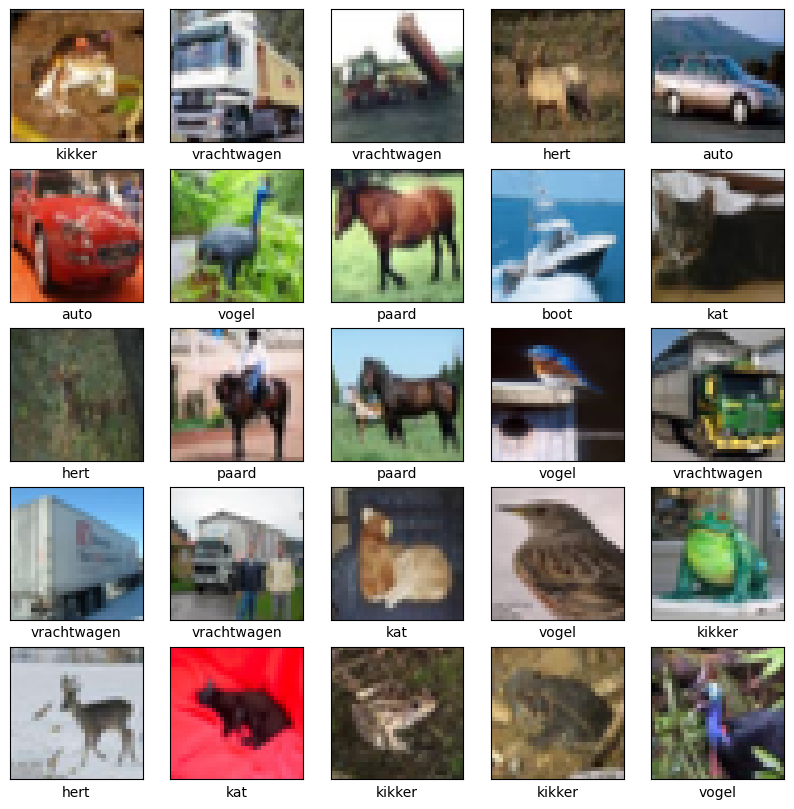

In [109]:
#toon de 1e 25 plaatjes met bijbehorende label (10 min)

# CIFAR-10 klasse namen
class_names = ['vliegtuig', 'auto', 'vogel', 'kat', 'hert', 'hond', 'kikker', 'paard', 'boot', 'vrachtwagen']

# Controleer de eerste 25 afbeeldingen en bijbehorende labels
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # Afbeeldingen tonen

    # Het label onder de afbeelding weergeven
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

## Data preparation

Nu we de data hebben ingelezen en hopelijk ook begrijpen kunnen we beginnen met de data preparation. Een neuraal netwerk bestaat uit 1 of meerdere Dense layers die een genormaliseerde vector verwachten.   

In [110]:
#Normaliseer de data en reshape de data naar een vector (10 min)

# Copy de datasetes voor later gebruik
test_images_org = test_images.copy()
train_images_org = train_images.copy()

# Normaliseren van de afbeeldingen naar waarden tussen 0 en 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshapen van de afbeeldingen van 32x32x3 naar een vector van 3072 (32*32*3)
train_images = train_images.reshape((train_images.shape[0], 32 * 32 * 3))
test_images = test_images.reshape((test_images.shape[0], 32 * 32 * 3))

# Controleer de nieuwe vormen van de afbeeldingen
print("Vorm van getrainde afbeeldingen na reshapen:", train_images.shape)
print("Vorm van testafbeeldingen na reshapen:", test_images.shape)

Vorm van getrainde afbeeldingen na reshapen: (50000, 3072)
Vorm van testafbeeldingen na reshapen: (10000, 3072)


Als het goed is hebben we nu 50.000 en 10.000 vectoren van 3072 (32x32x3) waarden. 

## Modeling
Nu kunnen we beginnen met het bouwen van ons eerste model wat hopelijk beter presteert dan volslagen willekeur. Omdat we toch ergens mee moeten beginnen nemen we het model uit de kennisbasis met twee hidden Dense layers van elk 16 neurons en relu als activation function als uitgangspunt. Zoek in de kennisbasis op hoeveel neurons de laatste laag moet hebben en wat de meest geschikte activation function voor de laatste laag is.

In [111]:
#definieer het model (10 min) en geef de summary.

# Model definieren
model = models.Sequential()

# Inputlaag en eerste hidden Dense layer met 16 neuronen en ReLU activatie
model.add(layers.Dense(16, activation='relu', input_shape=(32 * 32 * 3,)))

# Tweede hidden Dense layer met 16 neuronen en ReLU activatie
model.add(layers.Dense(16, activation='relu'))

# Outputlaag met 10 neuronen (voor elke klasse) en softmax activatie
model.add(layers.Dense(10, activation='softmax'))

# Samenvatting van het model printen
model.summary()

c:\Users\esmee\OneDrive\Documents\Projecten\MachineLearning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                │ (None, 16)             │        49,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,610 (193.79 KB)

 Trainable params: 49,610 (193.79 KB)

 Non-trainable params: 0 (0.00 B)

Compile het model met de juiste optimizer, loss-functie en metrics

In [112]:
#compile het model (2 min)
# Compileren van het model met optimizer, loss en metrics
model.compile(optimizer='adam',  # Optimizer voor het trainen van het model
              loss='sparse_categorical_crossentropy',  # Definieer de verliesfunctie, geschikt voor classificatieproblemen met meerdere klassen
              metrics=['accuracy'])  # Definieer de evaluatiemetrics, in dit geval nauwkeurigheid

Fit het model met de juiste datasets. Train 25 epochs. Bewaar de resultaten in een variabele (bijv history)

In [118]:
#fit model (5 min)
# Model trainen voor 25 epochs
model1 = model.fit(train_images, train_labels, # Begin het trainen van het model met de trainingsdata en labels
                    epochs=25, # Het aantal keren dat de volledige dataset door het model wordt gepasseerd
                    batch_size=32, # Grootte van de batches waarmee het model wordt getraind
                    validation_data=(test_images, test_labels))  # Validatiedata om de prestaties van het model tijdens het trainen te evalueren

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2493 - loss: 2.0243 - val_accuracy: 0.3670 - val_loss: 1.7599
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3639 - loss: 1.7523 - val_accuracy: 0.3717 - val_loss: 1.7364
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3924 - loss: 1.6837 - val_accuracy: 0.4140 - val_loss: 1.6356
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4040 - loss: 1.6489 - val_accuracy: 0.4199 - val_loss: 1.5980
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4203 - loss: 1.6099 - val_accuracy: 0.4263 - val_loss: 1.5964
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4295 - loss: 1.5833 - val_accuracy: 0.4239 - val_loss: 1.5997
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4385 - loss: 1.5680 - val_accuracy: 0.4407 - val_loss: 1.5578
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4423 - loss: 1.5438 - 

## Evaluation
Op basis van bovenstaande output kun je al concluderen dat ons model het nog niet heel erg goed doet. Voor de volledigheid plotten we de accurary en validated accuracy per epoch nog.

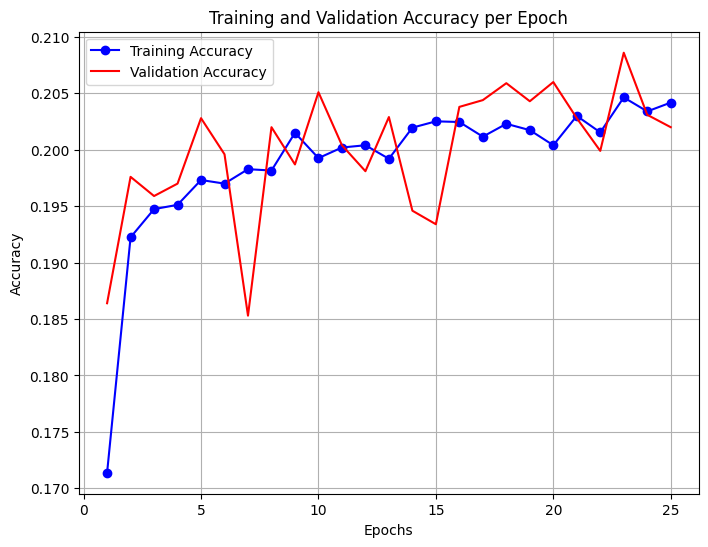

In [113]:
#plot de accuracy en validated accuracy (10 min)

# Extractie van de accuracies uit de history variabele
acc = model1.history['accuracy']
val_acc = model1.history['val_accuracy']

# Aantal epochs bepalen
epochs = range(1, len(acc) + 1)

# Plotten van de trainingsnauwkeurigheid en de validatienauwkeurigheid
plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

We zien hier dat ons model het beter doet dan willekeur maar erg gelukkig worden we er nog niet van. Blijkbaar is het herkennen van hertjes en vliegtuigen toch wat complexer dan alleen maar cijfers herkennen (in de kennisbasis kwamen we met dit model al rond de 98 procent uit) We gaan daarom kijken of we niet wat hogere scores kunnen bereiken door extra layers en neurons toe te voegen.

## Modeling

In [119]:
# Verschillende opties uitproberen (ca 20 min)
# denk aan extra lauers en meer neurons.
# Verbeterd model definieren
model = models.Sequential()

# Inputlaag en eerste hidden Dense layer met 64 neuronen en ReLU activatie
model.add(layers.Dense(64, activation='relu', input_shape=(32 * 32 * 3,)))

# Tweede hidden Dense layer met 64 neuronen en ReLU activatie
model.add(layers.Dense(64, activation='relu'))

# Derde hidden Dense layer met 32 neuronen en ReLU activatie
model.add(layers.Dense(32, activation='relu'))

# Vierde hidden Dense layer met 32 neuronen en ReLU activatie
model.add(layers.Dense(32, activation='relu'))

# Outputlaag met 10 neuronen (voor elke klasse) en softmax activatie
model.add(layers.Dense(10, activation='softmax'))

c:\Users\esmee\OneDrive\Documents\Projecten\MachineLearning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
#compile
# Model compileren met Adam optimizer, sparse_categorical_crossentropy loss en accuracy metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Samenvatting van het nieuwe model
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,298 (798.04 KB)

 Trainable params: 204,298 (798.04 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
#fit model
# Model trainen met 25 epochs en validatie op de test set
model2 = model.fit(train_images, train_labels,
                    epochs=25,
                    batch_size=32,
                    validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2262 - loss: 2.0554 - val_accuracy: 0.3446 - val_loss: 1.8025
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3504 - loss: 1.7889 - val_accuracy: 0.3789 - val_loss: 1.7320
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3893 - loss: 1.6967 - val_accuracy: 0.4044 - val_loss: 1.6486
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4034 - loss: 1.6434 - val_accuracy: 0.4104 - val_loss: 1.6363
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4239 - loss: 1.6121 - val_accuracy: 0.4226 - val_loss: 1.6127
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4311 - loss: 1.5844 - val_accuracy: 0.4211 - val_loss: 1.6038
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4358 - loss: 1.5583 - val_accuracy: 0.4171 - val_loss: 1.6104
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4438 - loss: 1.5401 - 

## Evaluation: 

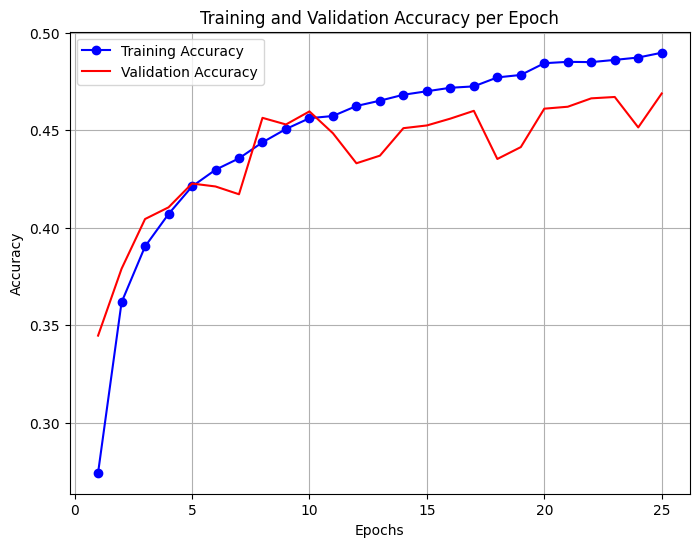

In [122]:
#plot de accuracy en validated accuracy
# Extractie van de accuracies uit de history variabele
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']

# Aantal epochs bepalen
epochs = range(1, len(acc) + 1)

# Plotten van de trainingsnauwkeurigheid en de validatienauwkeurigheid
plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')  # 'bo-' betekent blauwe stippen met een lijn
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')  # 'r-' betekent een rode lijn
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

We zien nu dat het model langzamerhand wat beter begint te presteren, om beter te begrijpen waar het mis gaat gaan we eerst de confusion matrix afdrukken.

In [95]:
#print de confusion matrix (20 min) op basis van de test_data

# Tip: standaard krijg je per afbeelding een array met 10 waarden terug (1 per klasse).
# De hoogste waarde hiervan is de klasse (auto, vliegtuig etc.) met de grootste kans.
# Hiervoor kun je argmax() gebruiken

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


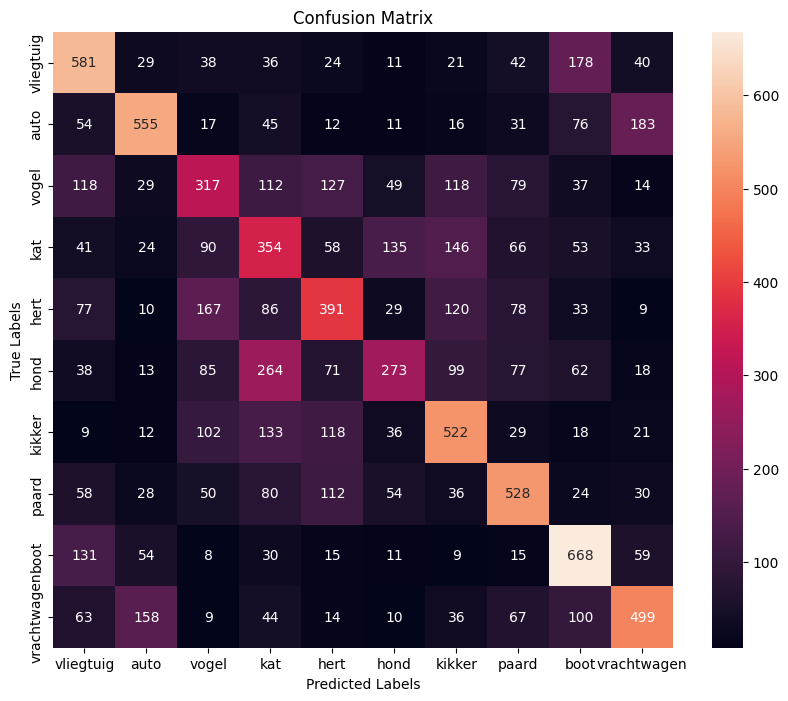

In [124]:
# Voorspellingen doen op de test set
predictions = model.predict(test_images)

# Haal de voorspelde klassen op door de hoogste waarschijnlijkheid (argmax)
predicted_classes = np.argmax(predictions, axis=1)

# Verwijder de dimensie van test_labels (bijv. (10000, 1) -> (10000,))
true_classes = test_labels.flatten()

# Maak de confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Visualiseer de confusion matrix met seaborn heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['vliegtuig', 'auto', 'vogel', 'kat', 'hert', 'hond', 'kikker', 'paard', 'boot', 'vrachtwagen'],
            yticklabels=['vliegtuig', 'auto', 'vogel', 'kat', 'hert', 'hond', 'kikker', 'paard', 'boot', 'vrachtwagen'])
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

De confusion matrix geeft ons al heel veel inzicht in wat er precies misgaat (Bijvoorbeeld dat relatief veel auto's voor een vrachtauto worden aangezien.) Soms helpt het echt ook om dingen te visualiseren. Daarom printen we de 1e 25 test afbeeldingen met hierbij de door ons model voorspelde waarden.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


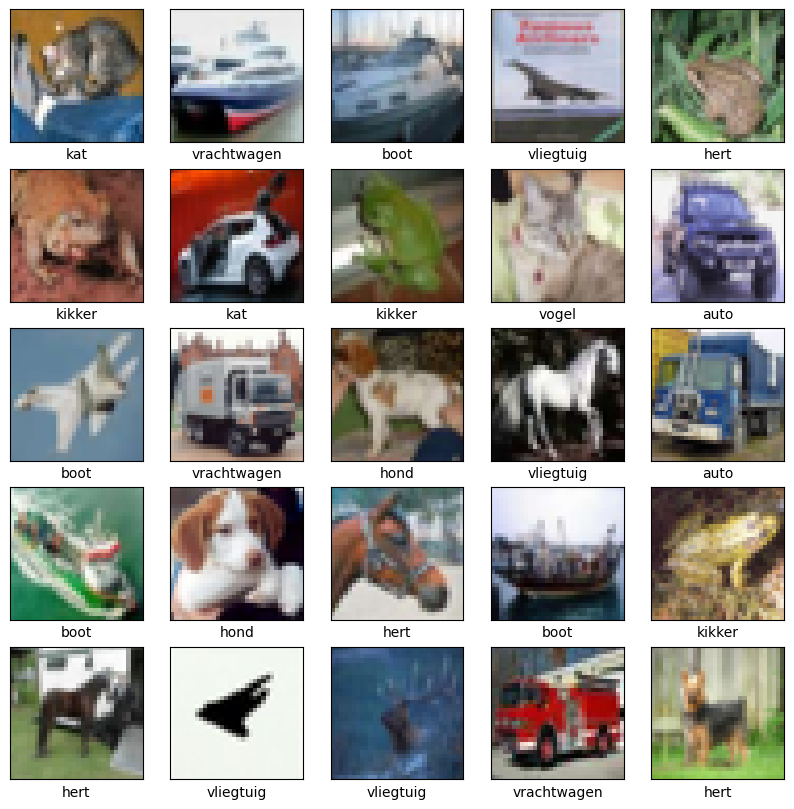

In [130]:
#print de 1e 25 plaatjes uit test_images en daarbij de voorspelde waarde. (15 min)

# Voorspellingen doen op de test set
predictions = model.predict(test_images[:25])

# De eerste 25 afbeeldingen en voorspellingen selecteren
num_images = 25
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i].reshape(32, 32, 3))
    plt.xlabel(f'{class_names[predictions[i].argmax()]}')

plt.show()

We zien nu een model wat ca de helft van de gevallen goed weet te voorspellen. Dit is al heel wat maar misschien nog niet helemaal wat we willen. Nu zien we ook (zeker als we meer epochs gaan draaien) dat het model ook steeds meer gaat overfitten. Probeer daarom verschillende waarden voor l1 en l2 om dit te voorkomen, zonder meteen je val_accuracy te laten instorten.  

## Modeling

In [143]:
#Probeer verschillende l1 en l2 waarden bij verschillende lagen (20 min)
# Verbeterd model met L1 en L2 regularisatie
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(32 * 32 * 3,),
                       kernel_regularizer=regularizers.l1_l2(0.01)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [144]:
#compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 560,522 (2.14 MB)

 Trainable params: 560,522 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [145]:
#fit model
model3 = model.fit(train_images, train_labels,
                    epochs=25,
                    batch_size=32,
                    validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1692 - loss: 7.5387 - val_accuracy: 0.1837 - val_loss: 2.6078
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1752 - loss: 2.6346 - val_accuracy: 0.1933 - val_loss: 2.5813
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1775 - loss: 2.6221 - val_accuracy: 0.1773 - val_loss: 2.6407
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1747 - loss: 2.6182 - val_accuracy: 0.1777 - val_loss: 2.5784
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1795 - loss: 2.6198 - val_accuracy: 0.1414 - val_loss: 2.7801
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1797 - loss: 2.6266 - val_accuracy: 0.1919 - val_loss: 2.5670
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1776 - loss: 2.6263 - val_accuracy: 0.1953 - val_loss: 2.6245
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1841 - loss: 2.6181 -

## Evaluation

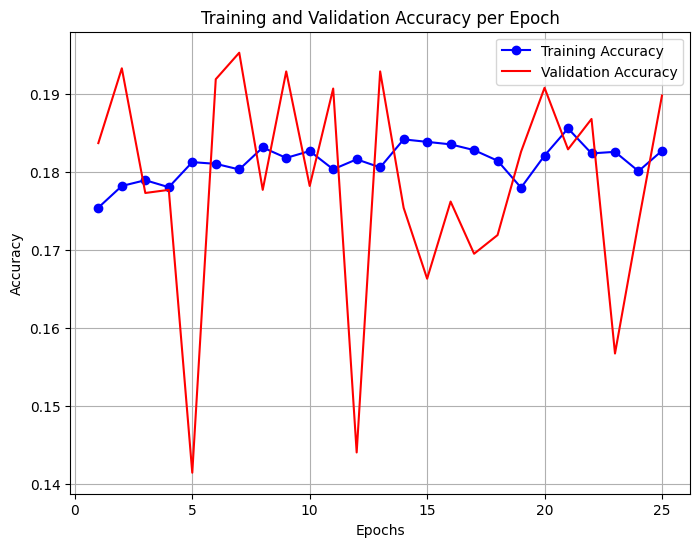

In [146]:
#plot de accuracy en validated accuracy
acc = model3.history['accuracy']
val_acc = model3.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Over het algemeen zien we dat het toevoegen van de regulators het overfitten wel beperkt maar in dit geval al snel ten koste van de (validated) accuracy gaat

## Modeling / Evaluation
Probeer nu nog eens door wat meer te variëren in je netwerk je de val_accuracy nog wat op te krikken. Denk aan extra Denselayers, extra neurons etc. Het best scorende resultaat zullen we het laatste kwartier van de les bespreken. Eén spelregel, we gebruiken alleen Dense layers!

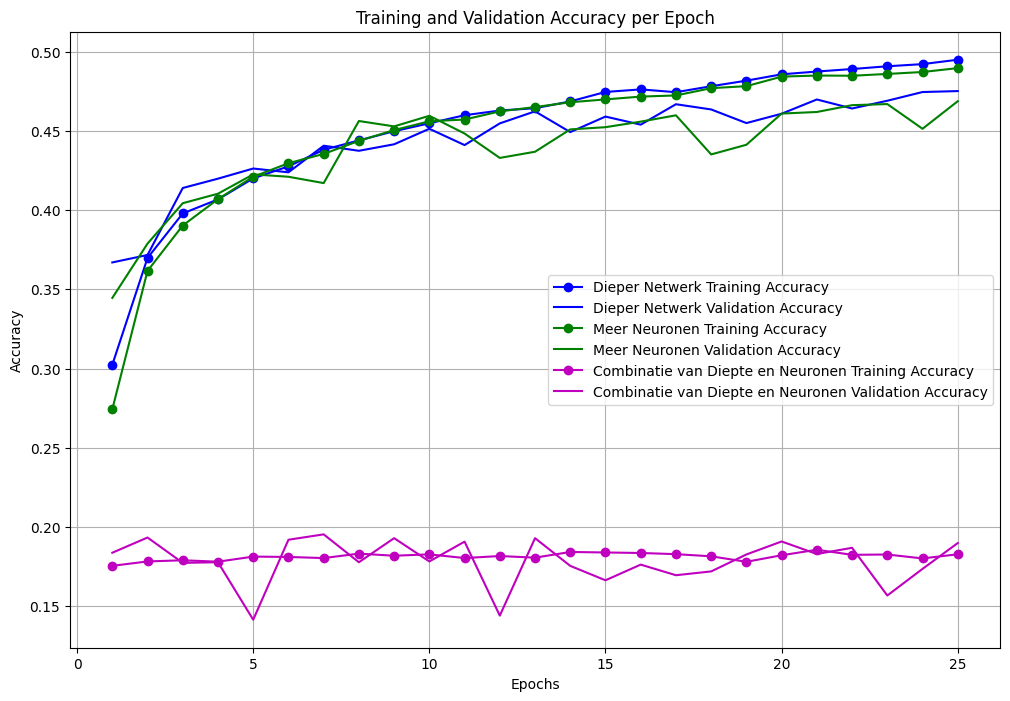

In [147]:
#meest optimale gevonden oplossing.

# Plot de resultaten van de verschillende modellen
def plot_history(histories, titles, colors):
    plt.figure(figsize=(12, 8))
    for history, title, color in zip(histories, titles, colors):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        epochs = range(1, len(acc) + 1)
        plt.plot(epochs, acc, f'{color}o-', label=f'{title} Training Accuracy')  # Plot training accuracy met marker
        plt.plot(epochs, val_acc, f'{color}-', label=f'{title} Validation Accuracy')  # Plot validatie accuracy zonder marker
    plt.title('Training and Validation Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Kleuren instellen voor elk model
colors = ['b', 'g', 'm']  # blauw, groen, magenta

# Plot de resultaten
plot_history(
    [model1, model2, model3],  # Geschikte modelgeschiedenissen
    ['Dieper Netwerk', 'Meer Neuronen', 'Combinatie van Diepte en Neuronen'],  # Nieuwe modelnamen
    colors  # Kleuren voor de lijnen
)

In hoeverre is een dergelijk neuraal netwerk geschikt om objecten te herkennen en waarom? (geef je antwoord hieronder)

### Geschiktheid van Neurale Netwerken voor Objectherkenning

Een neuraal netwerk met alleen Dense layers kan prima zijn voor eenvoudige objectherkenning, vooral bij een dataset zoals CIFAR-10, maar voor meer geavanceerde taken zijn CNNs meestal veel geschikter. CNNs bieden meestal betere prestaties en zijn efficiënter in het leren van visuele patronen en ruimtelijke relaties.